# Полиномиальные модели

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Парная регрессия

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [ ]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [ ]:
X = data.x
y = data.y
X.shape, y.shape

((100,), (100,))

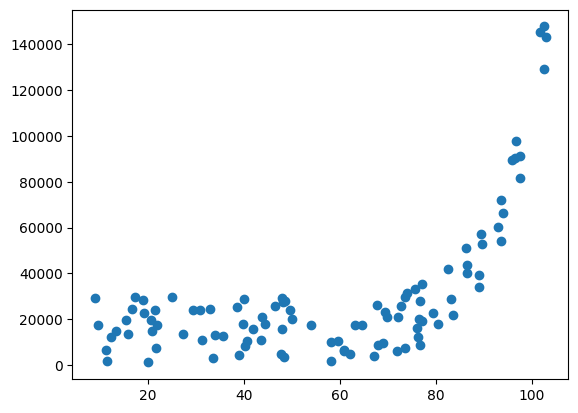

In [ ]:
plt.scatter(X, y)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


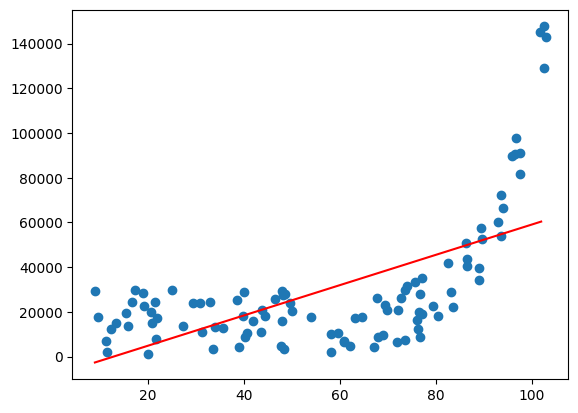

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [ ]:
linear.score(X, y)

0.37467360318911636

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformation = PolynomialFeatures(degree=2)

In [ ]:
transformation.fit(X)

PolynomialFeatures()

In [ ]:
X_2 = transformation.transform(X)

In [ ]:
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [ ]:
poly_2d = LinearRegression().fit(X_2, y)

In [ ]:
xx_2d = transformation.transform(pd.DataFrame(xx))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


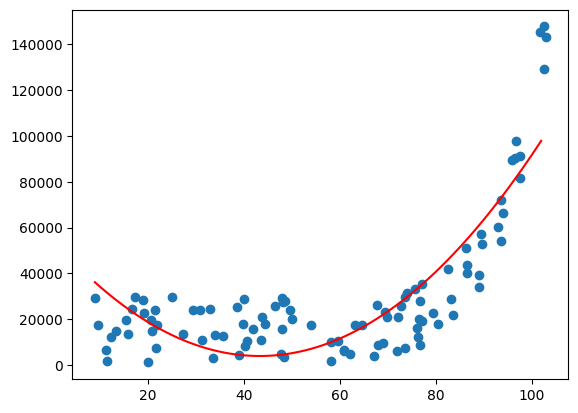

In [ ]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [ ]:
poly_2d.score(X_2, y)

0.7359753787024842

# Классификация

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

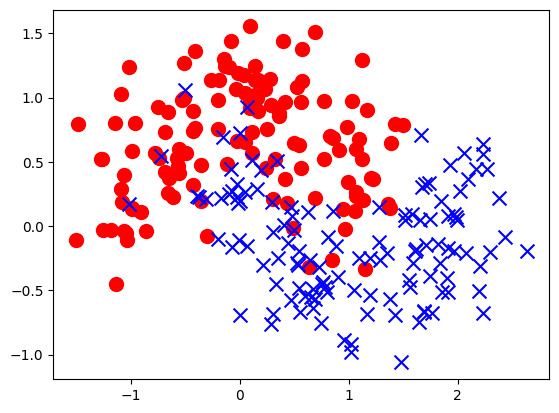

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


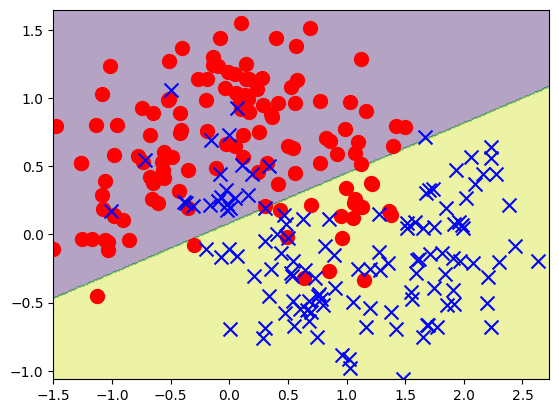

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
logistic.score(X, y)

0.832

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape

(250, 9)

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


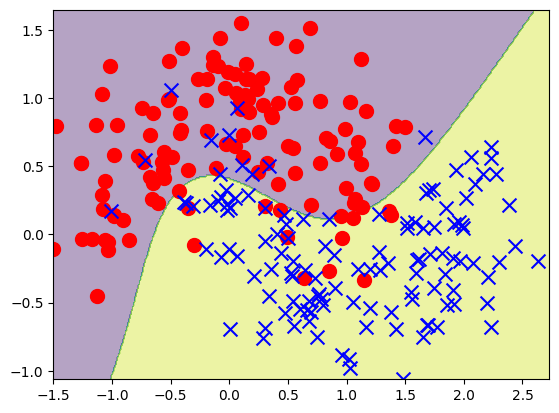

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_3.score(X_3, y)

0.9

# Регрессия на реальных данных

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

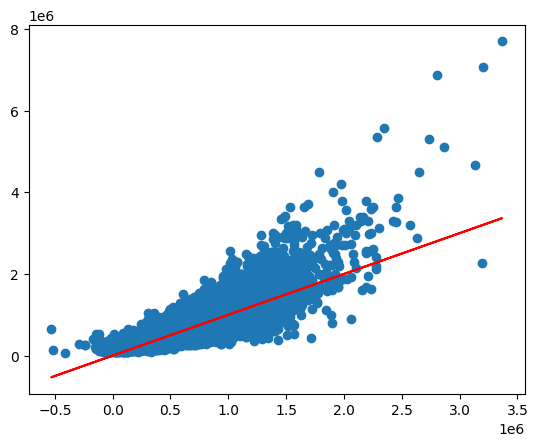

In [ ]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8650781867438108

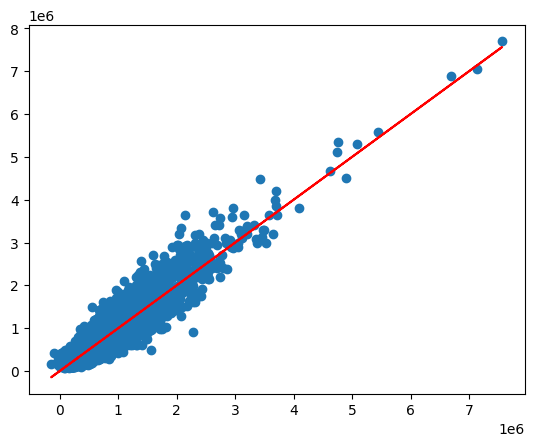

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

# Задания для самостоятельного выполнения

### 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import time

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv",
                   index_col=0)
X = data.x
X = pd.DataFrame(X)
y = data.y

start_time = time.time()
linear = LinearRegression().fit(X,y)
time1 = time.time()-start_time
print(f'Линейная регрессия: {time1}')

Линейная регрессия: 0.0024466514587402344


In [ ]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)

start_time = time.time()
poly_2d = LinearRegression().fit(X_2, y)
time2 = time.time()-start_time
print(f'Полиномиальная регрессия: {time2}')

Полиномиальная регрессия: 0.0022919178009033203


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

start_time = time.time()
logistic = LogisticRegression().fit(X, y)
time3 = time.time()-start_time
print(f'Логистическая регрессия: {time3}')

Логистическая регрессия: 0.04184746742248535


In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

start_time = time.time()
LogisticRegression().fit(X_3, y)
time4 = time.time()-start_time
print(f'Полиномиальная логистическая регрессия: {time4}')

Полиномиальная логистическая регрессия: 0.017644405364990234


In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
time5 = time.time()-start_time
print(f'Линейная регрессия на реальных данных: {time5}')

Линейная регрессия на реальных данных: 0.01607513427734375


In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
time6 = time.time()-start_time
print(f'Полиномиальная регрессия на реальных данных: {time6}')

Полиномиальная регрессия на реальных данных: 6.14164924621582


In [ ]:
data = {'Линейная': [time1],
        'Полиномиальная': [time2],
        'Логистическая': [time3],
        'Полиномиальная логистическая': [time4],
        'Линейная на реальных данных': [time5],
        'Полиномиальная на реальных данных': [time6]}

df = pd.DataFrame(data, index=['время'])
df

,Линейная,Полиномиальная,Логистическая,Полиномиальная логистическая,Линейная на реальных данных,Полиномиальная на реальных данных
время,0.002447,0.002292,0.041847,0.017644,0.016075,6.141649


### 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head(3)

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753


In [ ]:
X = data.x
y = data.y
X = pd.DataFrame(X)

In [ ]:
import time
def train_model(X, y, degree):
    transformation = PolynomialFeatures(degree=degree)
    transformation.fit(X)
    X_transformed = transformation.transform(X)

    start_time = time.time()
    poly = LinearRegression().fit(X_transformed, y)
    all_time = time.time() - start_time

    xx = pd.DataFrame(np.linspace(min(X.x), max(X.x), 100))
    yy = linear.predict(xx)
    xx_pred = transformation.transform(xx)
    yy_pred = poly.predict(xx_pred)

    plt.scatter(X.x, y)
    plt.plot(xx, yy_pred, c='r')
    plt.title(f'Модель {degree} порядка')
    plt.show()

    r2 = poly.score(X_transformed, y)

    return all_time, r2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


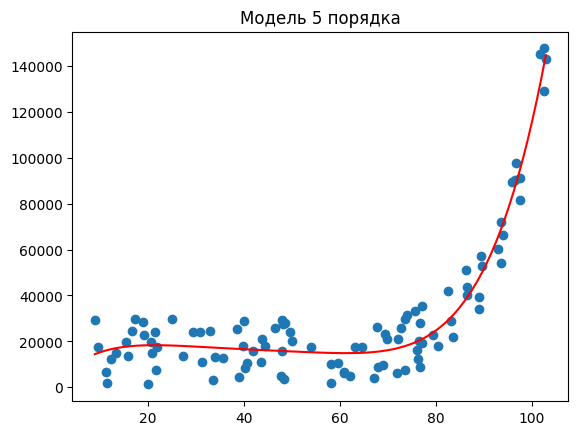

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


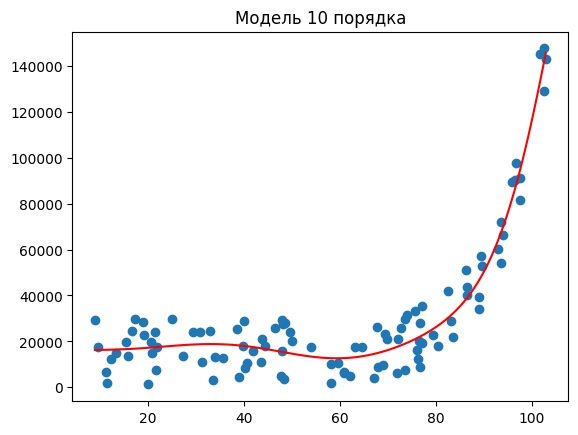

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


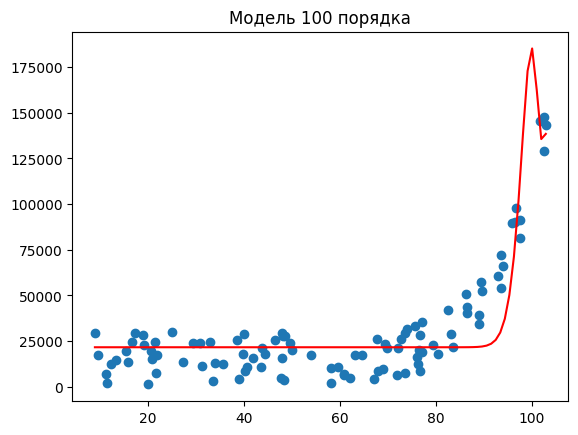

,Time,R^2
5,0.004564,0.921748
10,0.002004,0.9232
100,0.009325,0.792462


In [ ]:
degrees = [5, 10, 100]

results = pd.DataFrame(index=degrees, columns=['Time', 'R^2'])

for degree in degrees:
    all_time, r2 = train_model(X, y, degree)
    results.loc[degree] = [all_time, r2]

results

3. То же самое проделайте с датасетом для классификации и "King county".

# 3. То же самое проделайте с датасетом для классификации и "King county".

## для классификации

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

In [ ]:
def poly_classifier(X, y, dg, get_params=False, show=True):
    transformation = PolynomialFeatures(degree=dg, include_bias=False)
    X_ = transformation.fit_transform(X)

    start = time.time()
    logistic = LogisticRegression().fit(X_, y)
    time_ = time.time()-start
    score_ = logistic.score(X_, y)

    if show:
        print(f'Порядок модели: {dg}')
        print(f'Время обучения: {time_}')
        print(f'score: {logistic.score(X_, y)}')

        xx, yy = np.meshgrid(
        np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
        np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

        Z = logistic.predict(transformation.transform(XX)).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

    if get_params:
        return [time_, score_]

Порядок модели: 5
Время обучения: 0.01264643669128418
score: 0.916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


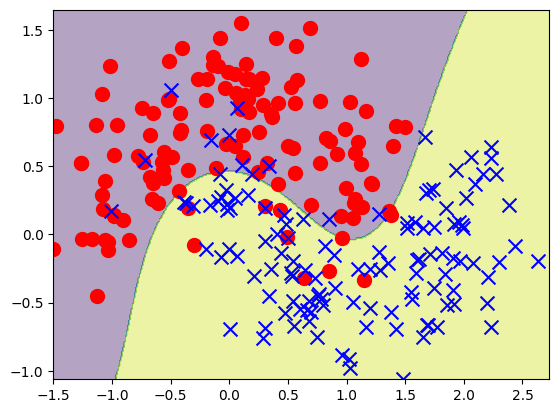

In [ ]:
poly_classifier(X, y, 5)

Порядок модели: 10
Время обучения: 0.029871225357055664
score: 0.924


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


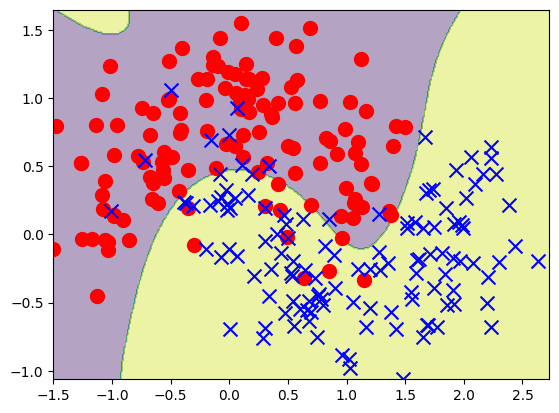

In [ ]:
poly_classifier(X, y, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Порядок модели: 100
Время обучения: 0.04389786720275879
score: 0.5


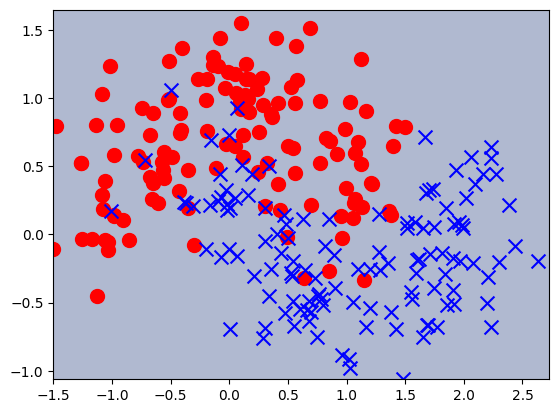

In [ ]:
poly_classifier(X, y, 100)

## King county

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
def kc_classifier(X_kc_prices, y_kc_prices, dg, get_params=False, show=True):
    X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=dg)).fit_transform(X_kc_prices)

    start = time.time()
    reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
    time_ = time.time() - start
    score_ = reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

    if show:
        print(f'Порядок модели: {dg}')
        print(f'Время обучения: {time_}')
        print(f'score: {score_}')

        y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
        plt.scatter(y_pred_kc_prices, y_kc_prices)
        plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
        plt.show()

    if get_params:
        return [time_, score_]

Порядок модели: 2
Время обучения: 0.37575507164001465
score: 0.8287749137066884


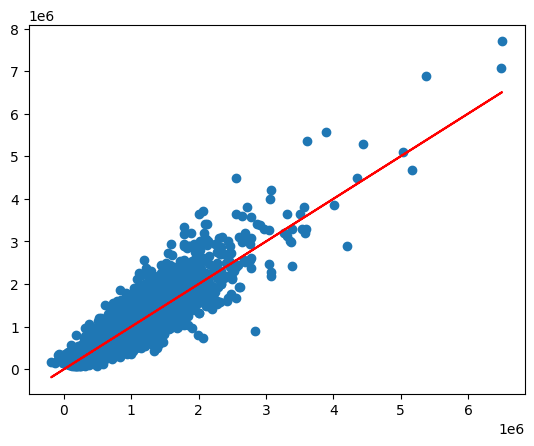

In [ ]:
kc_classifier(X_kc_prices, y_kc_prices, 2)

Порядок модели: 3
Время обучения: 6.243927001953125
score: 0.8650781867438108


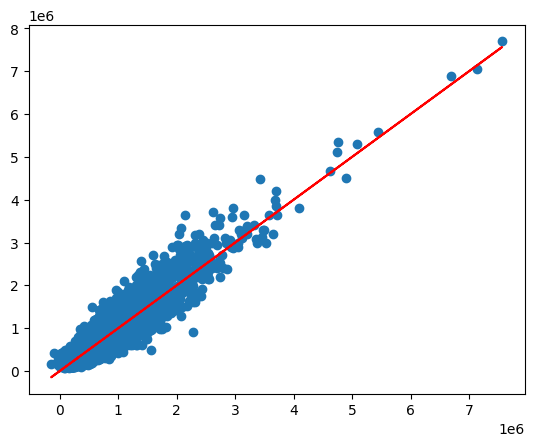

In [ ]:
kc_classifier(X_kc_prices, y_kc_prices, 3)

# 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


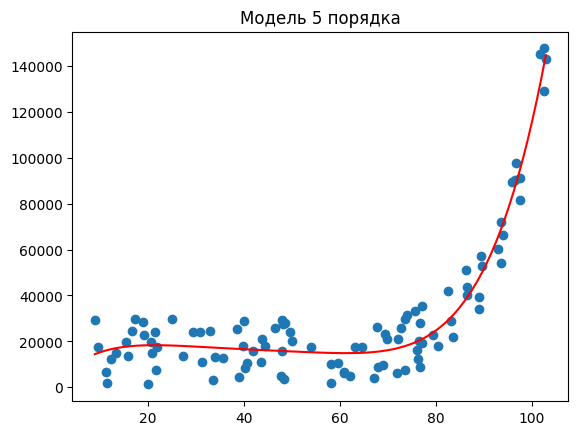

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


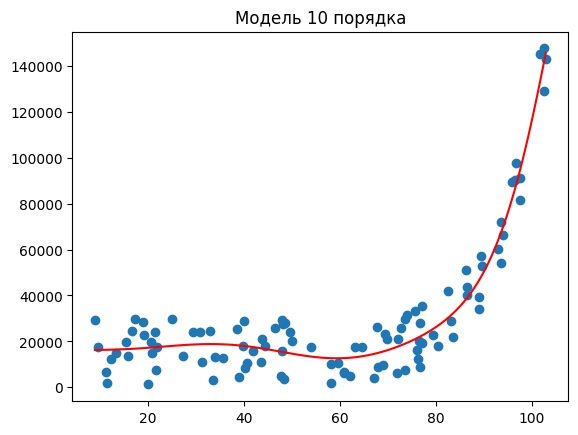

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


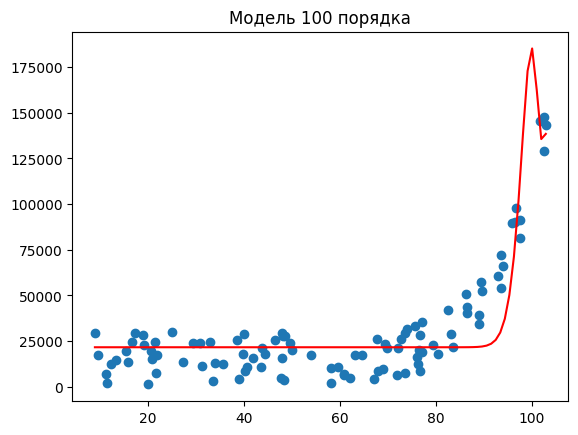

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv",
                  index_col=0)
X = pd.DataFrame(data.x)
y = data.y
gen_reg_5 = train_model(X, y, 5)
gen_reg_10 = train_model(X, y, 10)
gen_reg_100 = train_model(X, y, 100)

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
class_5 = poly_classifier(X, y, 5, show=False, get_params=True)
class_10 = poly_classifier(X, y, 10, show=False, get_params=True)
class_100 = poly_classifier(X, y, 100, show=False, get_params=True)

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
kc_2 = kc_classifier(X_kc_prices, y_kc_prices, 2, show=False, get_params=True)
kc_3 = kc_classifier(X_kc_prices, y_kc_prices, 3, show=False, get_params=True)

In [ ]:
comp = {'gen_regression5': gen_reg_5,
         'gen_regression10': gen_reg_10,
         'gen_regression100':gen_reg_100,
         'gen_classiffication5': class_5,
         'gen_classiffication10': class_10,
         'gen_classiffication100': class_100,
         'king_country2': kc_2,
         'king_country3': kc_3,

         }
pd.DataFrame(comp, index=['Время', 'Score'])

,gen_regression5,gen_regression10,gen_regression100,gen_classiffication5,gen_classiffication10,gen_classiffication100,king_country2,king_country3
Время,0.001841,0.003095,0.012192,0.009402,0.019873,0.05429,0.596746,6.807807
Score,0.921748,0.923200,0.792462,0.916000,0.924000,0.50000,0.828775,0.865078


# 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [ ]:
y = data_kc_prices.price
X = data_kc_prices.drop(["id", "date", "price"], axis=1)

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Регрессоры': feature_names, 'Коэффициенты': coefficients})
coefficients_df

,Регрессоры,Коэффициенты
0,bedrooms,-35766.541444
1,bathrooms,41144.278532
2,sqft_living,110.442865
3,sqft_lot,0.128598
4,floors,6689.550115
5,waterfront,582960.458423
6,view,52870.942384
7,condition,26385.649139
8,grade,95890.445151
9,sqft_above,70.785224


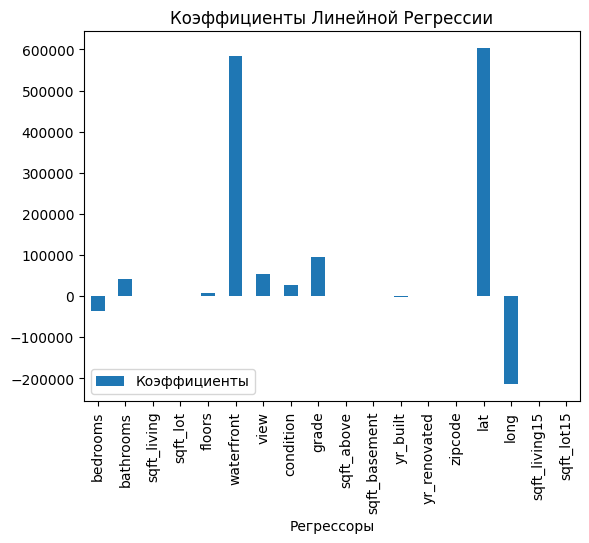

In [ ]:
coefficients_df.plot.bar(x='Регрессоры', y='Коэффициенты', title='Коэффициенты Линейной Регрессии')
plt.show()

# 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
kc2_score = reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)
kc2_score

0.8650781867438108

In [ ]:
X_kc_prices.shape

(21613, 18)

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc.coef_.shape

(1330,)

In [ ]:
reg_poly2_kc.coef_

array([-1.34523860e+01,  8.46261127e-01, -8.34499147e+00, ...,
       -6.53388269e-08, -9.19226473e-09, -3.93285404e-12])

In [ ]:
reg_poly2_kc.coef_[1:19]

array([ 8.46261127e-01, -8.34499147e+00, -1.69215557e+00,  1.95730279e+00,
        8.42241177e-01, -1.98517152e+00,  1.92714711e+00,  2.12603367e-01,
       -1.36590236e-01, -3.40055491e-01, -9.69926618e-03, -1.70881121e-02,
        9.99459063e-02, -3.82607904e-02, -5.56459511e-03, -2.98876067e-02,
       -4.59728728e-02, -1.40842977e-02])

In [ ]:
coef = np.hstack((reg_poly2_kc.coef_[1:19], reg_poly2_kc.intercept_))
names = np.hstack((np.array(X_kc_prices.columns), np.array(['Intercept'])))
coeff = {'Coefficients':coef}
round(pd.DataFrame(coeff, index=names), 3)

,Coefficients
bedrooms,8.460000e-01
bathrooms,-8.345000e+00
sqft_living,-1.692000e+00
sqft_lot,1.957000e+00
floors,8.420000e-01
waterfront,-1.985000e+00
view,1.927000e+00
condition,2.130000e-01
grade,-1.370000e-01
sqft_above,-3.400000e-01
